\begin{exercise}
8.1. 
\end{exercise}


In [77]:
library(mlbench)
set.seed(200)
df <- mlbench.friedman1(200,sd=1)
df <- data.frame(cbind(df$x,df$y))
colnames(df)[ncol(df)] <- "y"
head(df)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
0.5337724,0.6478064,0.85078526,0.18159957,0.92903976,0.36179060,0.8266609,0.4214081,0.59111440,0.5886216,18.46398
0.5837650,0.4381528,0.67272659,0.66924914,0.16379784,0.45305931,0.6489601,0.8446239,0.92819306,0.7584008,16.09836
0.5895783,0.5879065,0.40967108,0.33812728,0.89409334,0.02681911,0.1785614,0.3495908,0.01759542,0.4441185,17.76165
0.6910399,0.2259548,0.03335447,0.06691274,0.63744519,0.52500637,0.5133614,0.7970260,0.68986918,0.4450716,13.78730
0.6673315,0.8188985,0.71676079,0.80324287,0.08306864,0.22344157,0.6644906,0.9038919,0.39696995,0.5500808,18.42984
0.8392937,0.3862983,0.64618857,0.86105431,0.63038947,0.43703891,0.3360117,0.6489177,0.53116033,0.9066182,20.85817


In [2]:
library(e1071)
skew_info <- apply(df,2,skewness)
sort(skew_info,decreasing = T)

X4            X7            X6            X9             y 
 0.1321730061  0.1171995975  0.0446236439  0.0275459493 -0.0003679215 
           X1            X8            X2            X5            X3 
-0.0146223766 -0.0305118975 -0.0364974029 -0.0700650801 -0.0945172159 
          X10 
-0.1025775567

Loading required package: ggplot2


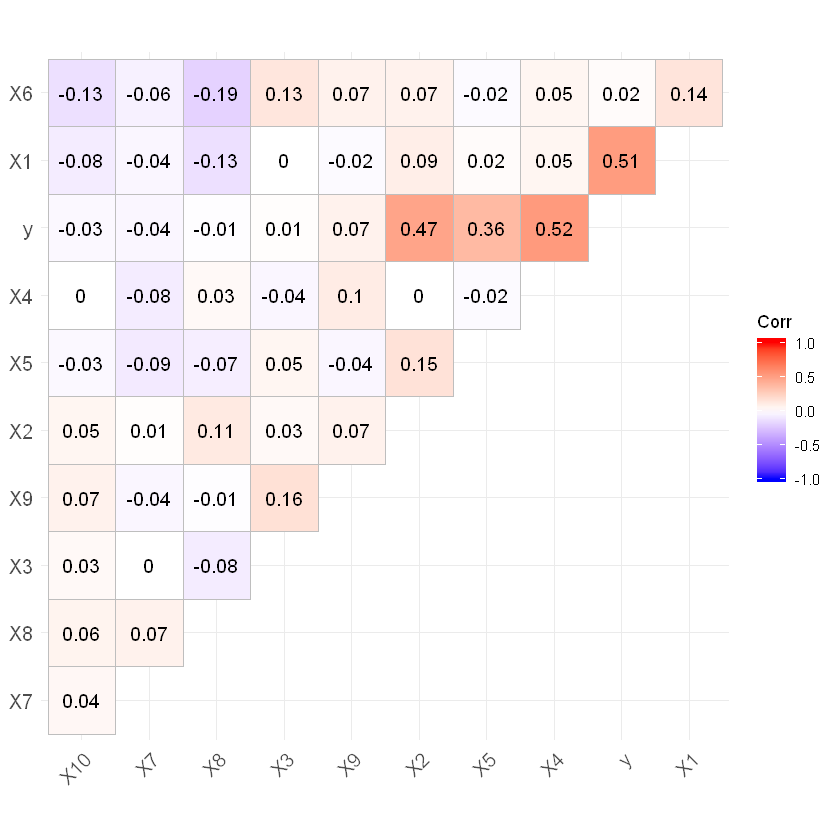

In [3]:
#cor
library(ggcorrplot)
ggcorrplot(round(cor(df),2), hc.order = TRUE, type = "upper", lab = TRUE)

In [78]:
library(randomForest)
library(caret)
fit_rf1 <- randomForest(y~.,data=df,importance=T,ntree=1000)
# varImpPlot(fit_rf)

\begin{remark}
must be careful with output of varImp before using cbind,
the order might be different
\end{remark}

In [80]:
feat_imp <- varImp(fit_rf1,scale=F)
feat_imp <- rbind(feat_imp,NaN)
rownames(feat_imp)[11] <- c("HighCor")
feat_imp

,Overall
X1,8.732235404
X2,6.415369387
X3,0.763591825
X4,7.615118809
X5,2.023524577
X6,0.165111172
X7,-0.005961659
X8,-0.166362581
X9,-0.095292651
X10,-0.074944788


In [81]:
#b. add highly correlated perdictors
set.seed(100)
df$HighCor <- df$X1 + rnorm(200)*.1
cor(df$X1,df$HighCor)

[1] 0.9509187

In [88]:
fit_rf2 <- randomForest(y~.,data=df,importance=T,ntree=1000)
apply(cbind(feat_imp,varImp(fit_rf2,scale = F)),2,round)

,Overall,Overall
X1,9,7
X2,6,6
X3,1,1
X4,8,7
X5,2,2
X6,0,0
X7,0,0
X8,0,0
X9,0,0
X10,0,0


\begin{remark}
(b.)
\end{remark}


In [89]:
#rf based on conditional inference trees
library(party)
set.seed(147)
fit_rf3 <- cforest(y~.,data=df[,1:11],controls=cforest_control(ntree=1000))
set.seed(147)
fit_rf4 <- cforest(y~.,data=df,controls=cforest_control(ntree=1000))

In [114]:
feat_imp <- cbind(
    round(data.frame(varimp(fit_rf3)),2),
    round(data.frame(varimp(fit_rf3,conditional = T)),2)
    )

feat_imp <- rbind(feat_imp,NaN)
rownames(feat_imp)[11] <- c("HighCor")

feat_imp <- cbind(
    feat_imp,
    round(data.frame(varimp(fit_rf4)),2),
    round(data.frame(varimp(fit_rf4,conditional = T)),2)
    )

colnames(feat_imp) <- c("Original","COR","ConInf","ConInf_Cor")
feat_imp

,Original,COR,ConInf,ConInf_Cor
X1,9.01,2.97,6.43,1.32
X2,6.80,3.97,6.41,3.73
X3,0.05,0.03,0.04,0.01
X4,8.81,4.91,8.07,4.63
X5,2.17,0.72,2.19,0.81
X6,0.00,0.02,0.03,0.01
X7,0.11,0.02,0.11,0.01
X8,-0.07,-0.01,-0.07,-0.01
X9,-0.03,-0.01,-0.03,0.00
X10,-0.02,0.01,-0.04,-0.01


In [122]:
feat_imp$feat <- factor(rownames(feat_imp),levels=rownames(feat_imp))
feat_imp<- feat_imp[,c(5,1:4)]
rownames(feat_imp) <- NULL
library(reshape2)
mlt <- melt(feat_imp)

Using feat as id variables


Warning message:
"Removed 2 rows containing missing values (geom_point)."

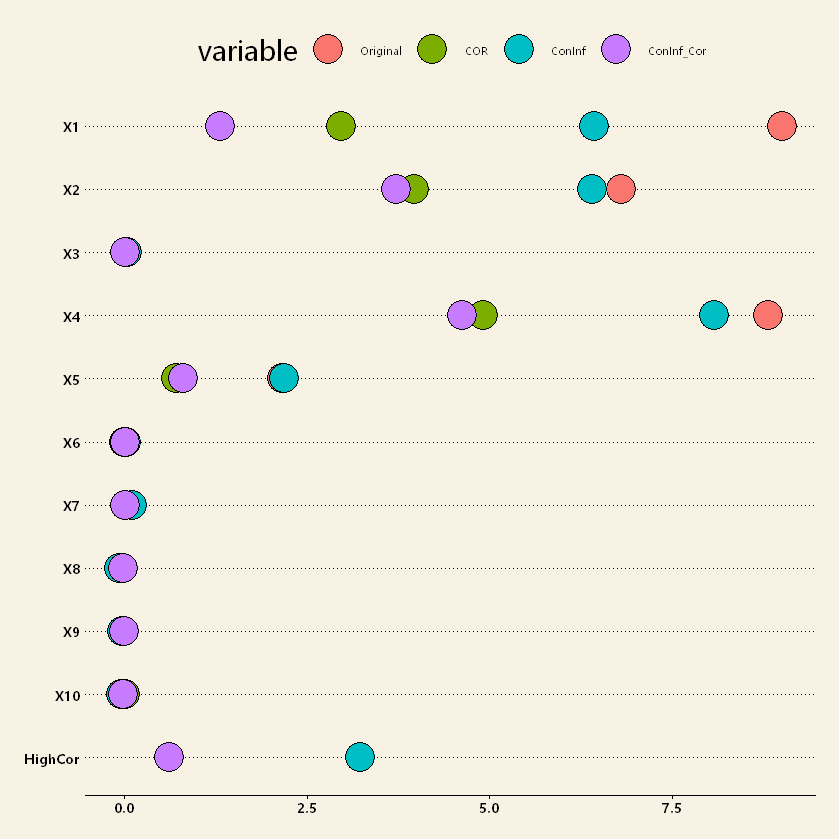

In [133]:
mlt$feat <- factor(mlt$feat,c('HighCor','X10','X9','X8','X7','X6','X5','X4','X3', 'X2', 'X1'))
ggplot(mlt, aes(value,feat,fill = variable)) +
    geom_point(shape=21,size=8) + 
    theme_wsj(title_family = "YaHei",base_family ="YaHei",base_size =8) 

- (d)

In [184]:
colnames(df)

[1] "X1"      "X2"      "X3"      "X4"      "X5"      "X6"      "X7"     
 [8] "X8"      "X9"      "X10"     "HighCor" "y"

In [181]:
library(ipred)
set.seed(147)
fit_bag1 <- bagging(y~.,data=df[,names(df)!="HighCor"],nbag=50)
set.seed(147)
fit_bag2 <- bagging(y~.,data=df,nbag=50)

In [188]:
col_name <- c('X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','HighCor')
imp_bag1 <- varImp(fit_bag1)
names(imp_bag1) <- "original"
imp_bag1$feat <- factor(rownames(imp_bag1),levels = col_name)

imp_bag2 <- varImp(fit_bag2)
names(imp_bag2) <- "original"
imp_bag2$feat <- factor(rownames(imp_bag2),levels = col_name)

In [193]:
merge(imp_bag1,imp_bag2,by = 'feat',all.y = TRUE)

feat,original.x,original.y
X1,1.9241504,1.8221721
X2,2.3043817,2.2644641
X3,1.3663712,1.1905058
X4,2.7656282,2.6933430
X5,2.4252363,2.3287829
X6,1.0027788,0.8736762
X7,0.9364069,0.8761946
X8,0.5814529,0.4716510
X9,0.6762370,0.5921200
X10,0.8571977,0.7840515


In [196]:
library(Cubist)
set.seed(147)
fit_cubist1 <- cubist(x=df[,1:10],y=df$y,committees=100)
set.seed(147)
fit_cubist2 <- cubist(x=df[,names(df)!="y"],y=df$y,committees=100)

In [197]:
imp_cubist1 <- varImp(fit_cubist1)
names(imp_cubist1) <- "original"
imp_cubist1$feat <- factor(rownames(imp_cubist1),levels = col_name)

imp_cubist2 <- varImp(fit_cubist2)
names(imp_cubist2) <- "original"
imp_cubist2$feat <- factor(rownames(imp_cubist2),levels = col_name)

In [198]:
merge(imp_cubist1,imp_cubist2,by = 'feat',all.y = TRUE)

feat,original.x,original.y
X1,71.5,69.0
X2,58.5,62.0
X3,47.0,44.0
X4,48.0,47.0
X5,33.0,27.5
X6,13.0,11.0
X7,0.0,0.0
X8,0.0,3.5
X9,0.0,0.0
X10,0.0,0.0


\begin{exercise}
2.Use a simulation to show tree bias with different granularities.
\end{exercise}
